# Python - part 2

Now we focus on working with data in python

To load the data, we will use uproot, a python package that lets you access root files in python


## Uproot
two good sources:
- https://masonproffitt.github.io/uproot-tutorial/ --- nice specific tutorial
- https://uproot.readthedocs.io/en/latest/basic.html --- bit more in-depth

In [1]:
### Import uproot


In [ ]:
### import matplotlib, numpy, and mplhep


---

## We have data from $J/ \Psi \rightarrow \mu^+ \mu^-$ data from the LHCb detector

One can load the data as a numpy, pandas, or awkward object. We have covered numpy, and so we will go for pandas, as it has some functionality that is especially great for doing quick and easy-to-read operations on data

### What is uproot

In [ ]:
# define where file is:

# alternate path


In [ ]:
# open file


In [ ]:
# What is in the file?


In [ ]:
### open the decay tree


In [ ]:
# load data as a pandas data frame


In [ ]:
# look at this data frame


In [2]:
# look at the J/Psi Mass


uproot arrays method has some useful capabilities.

First there is the expressions option, which specifies which variables we want. For a very large data set we may not be able to keep all the variables in memory, or we may just limit to a subset to keep it quick.

In [ ]:
### only getting out JPsi mass


We can also use aliases, which allow us to both rename variables, and compute expressions

In [ ]:
### use aliases


The arrays method has more options, see https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.HasBranches.html#uproot-behaviors-tbranch-hasbranches-arrays

We do need to close the file too

In [ ]:
### close file


So there you go! We have accessed the data in this root file. There are some more complicated things one can do with uproot, which the links at the beginning should have information on, but you may never need to do anything more complicated

---

---

### Let's get started with the data

In [ ]:
# load file

## we have put this in a with statement so the file is automatically closed once we leave the statement
## prevents wasting memory

In case that doesn't work

In [ ]:
### alternate loading of .csv file


In [ ]:
### alternate loading of .root file


## lots of data!
what is all this? using .columns method, we can see all the data we have

In [ ]:
### inspect what data we have


Let us have a look at just the $J/\Psi$ mass

In [ ]:
### inspect the J/Psi mass


How about a plot

## challenge 1 - Make a histogram of the $J/\Psi$ mass with 100 bins

In [ ]:





### hint: plt.hist( X ) makes a histogram of the data X 
### hint: plt.hist( X , bins = N ) makes a histogram of the data X with N bins

---

---

### Cool way to do plots

We will make a useful function to do plots. Don't worry what it is doing in any detail. T

here is some documentation here https://mplhep.readthedocs.io/en/latest/api.html#mplhep.histplot

In [ ]:
def plot_mass(df, label = None, density = False, bins = 100):
    h, bins = np.histogram(df['Jpsi_M'], bins=bins, range=[2.75, 3.5])
    mplhep.histplot(h, bins, density=density, yerr=True, label = label)
    plt.xlabel('$J/\\psi$ mass [GeV]')
    plt.xlim(bins[0], bins[-1])

In [ ]:
### make plot using plot_mass function


---

---

### working with the data
Pandas let's us play with the data to make other variables in simple strings: this used the data frames eval method

### $\eta = arctanh( \frac{p_z}{p} )$
eta is a common particle physics parameter

In [ ]:
### evaluate eta


In [ ]:
### eta now in the data frame


We have now computed eta for Jpsi for each event, and added it to the data frame as if it was in the root file! Very convenient

## challenge 2 - Add variables mup_P & mum_P 
the total momentum of the $\mu^+$ and $\mu^-$ respectivley

In [ ]:





### hint: the sqrt() method can be used in the pandas strings
### hint: the total momentum: P = sqrt( Px**2 + Py**2 + Pz**2 )
### hint: look at the data frame and it's columns (use data_df.columns) to see what data is available
### hint: mup = mu+ ; mum = mu-

---

---

## Selection
We can remove any rows of our data frame that correspond to a False result in some statement

In [ ]:
### Get Jpsi PT before and after PT cut



In [ ]:
### plot the two PT distributions


## challenge 3 - 
Make a selection on $J/\Psi$ Mass ($J/\Psi$ Mass > 3.0 GeV) & make a histogram of the mass, including both before and after the cut


In [ ]:


### hint: data_df.query("...") returns the data frame with a cut specified in the string
### hint: data_frame.(...) returns just that variable

### Background reduction

There is always background in real data, so let's try a cut to improve our signal sensitivity.

In [ ]:
### plot comparing J/Psi mass distribution with and without a PT cut


Let's try a density plot to make this a bit clearer to see

In [ ]:
### use density


---

---

# Use simulation

To help us figure out what cuts will and won't discriminate between signal and background, rather than just trying to make the histogram pointier, we can look at simulation of signal, and compare it to background

We get out signal from monte-carlo (MC) simulation

We use the Sidebands ($J/\Psi$ candidate mass either side of where the signal process is) to model background

In [ ]:
### load simulation


In [ ]:
### alternate load .root


In case that doesn't work, I have a .csv file

In [3]:
### alternate load .csv


This is our $J/\Psi \rightarrow \mu^+ \mu^-$ simulation

In [ ]:
### plot simulation J/Psi M distribution


Often it is useful to use a logarithmic y-scale

In [ ]:
### plot with log scale


# Background

We get background from the sidebands

If signal is roughly only within the region $3.0 $ GeV$ \; < \; M(J/\Psi) \; < \, 3.2 $ GeV, then we can use the data outside this region to model the background.

Let's take data from outside this region

In [ ]:
### Cut to just get upper and lower mass sidebands


### We now have:
* bkgd. sample using the sideband: bkg_df
* Signal. sample using simulation: mc_df

Great, so now what?

We can now inspect the different variables at hand to see if they will help disriminate between signal and background

Let's start with $P_T$

In [ ]:
### Compare background and signal PT distributions


So there is some discrimination! But maybe it's not that powerful

Here we only have kinematic parameters ( They tell us about the particle momenta )

We often use 'vertex' variables, since a powerful discrimination uses the vertexing of the B-meson, some examples

- $\chi^2_{IP}$ We may use the impact parameter of the muons (really the $\chi^2$ because we want to select on the confidence in the muon not being from the PV).
***
- $\chi^2_{vertex}$ The confidence in the two muons having a common vertex, i.e., they came from a B meson.
***
- DIRA -> When we reconstruct a b or c meson decay, we can compute it's momentum from the sum of momenta of daughters. We can also reconstruct it's decay vertex (the displaced vertex or DV) from the best fit common point of the daughter trajectories. The B momentum and the line connecting the PV and DV should be parallel, so it is useful in selecting against  combinatorial, where there isn't a B meson mother.

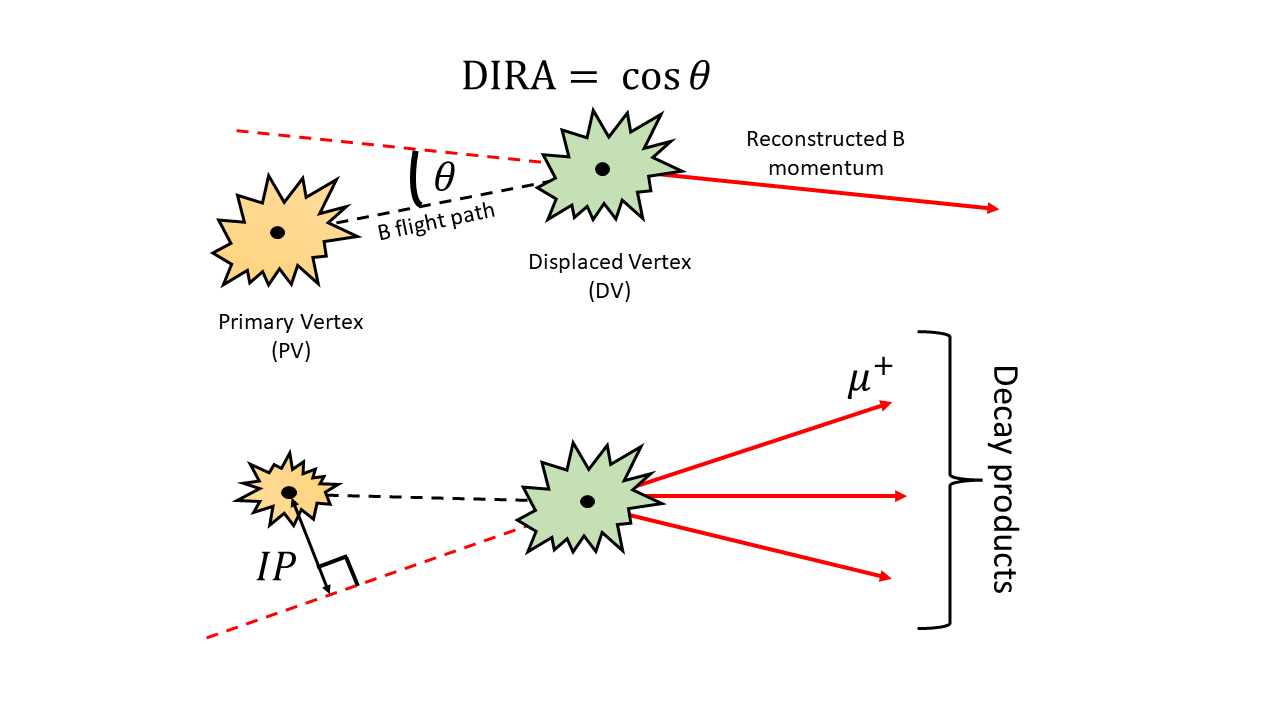

LHCb doesn't just use vertex information though, we have another powerful tool ... PID

PID : Particle Idenficiation

muons can often be misidentified as pions (and vice-versa) since they are similar in mass giving similar RICH signatures.

We can discriminate pions and muons though. pions interact strongly and so leave signatures in the HCAL, muons pass by the calos more often, and we can observe them in the final part of the LHCb, the muon stations

### Let's look at the probability of the muon candidates being muons

In [ ]:
### Compare PID variables


### Let's look at the probability of muon candidates being pions

In [ ]:
### Compare PID variables


So in this case PID information isn't going to help either

Our best cut is probably in PT

In [ ]:
### Signal & Bkgd. J/Psi Mass comparison with PT cut


---

---

# Extension

## More on Uproot
We typically work with .root files in HEP, and a useful tool in uproot is to take a pandas data frame, which maybe you have made selections and evaluations on and then make a new .root file. root files tend to be small in size due to compression, and easy for others to access.

More detail here: https://uproot.readthedocs.io/en/latest/basic.html#writing-ttrees-to-a-file

In [ ]:
### write a root file from a pandas data frame

### you have now made a new root file with trees of 'Data' and 'Simulation'

## More on Pandas

For my analyses I use uproot to load data, and then work with it using pandas, doing any analysis / fitting on data using zfit (see a future starterkit lesson)

So let's go through pandas to see why it can be very useful.

In [ ]:
### make a pandas data frame


We can turn a python dictionary made up of arrays into a pandas data frame

We can now do some maths on this

In [ ]:
### evaluate a new variable with pandas eval method


What if I wanted to process the data over a custom function?

In [ ]:
### evaluate a function with pandas eval method


where did c go? We need to use inplace = True

In [ ]:
### Use inplace = True to keep the variable in the data frame


The backend of pandas is numpy, so we need to have functions be in terms of numpy

We can make cuts on pandas data frames:

In [ ]:
### cut on data frame using function


We can even use f-strings

In [ ]:
### cut using f-strings


This allows you to process data in a very clear way, easy for someone to see what you are doing and spot mistakes. Clearer, shorter code also makes errors less common.

---